## House Price Rent

## Import libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
data=pd.read_csv("Hyderabad_House_Data.csv")

In [66]:
data.columns

Index(['Unnamed: 0', 'Bedrooms', 'Washrooms', 'Furnishing', 'Tennants', 'Area',
       'Price', 'Locality'],
      dtype='object')

In [67]:
data.head()

,Unnamed: 0,Bedrooms,Washrooms,Furnishing,Tennants,Area,Price,Locality
0,0,3 BHK Builder Floor,2,Furnished,Bachelors/Family,1800 sqft,"34,000","Bhagyalaxmi Nagar, Kavadiguda"
1,1,3 BHK Apartment,2,Semi-Furnished,Family,2500 sqft,"45,000","Gachibowli, Outer Ring Road"
2,2,1 BHK Builder Floor,Immediately,Furnished,Bachelors/Family,read more,"18,000",Gachibowli
3,3,3 BHK Apartment,Immediately,Furnished,Bachelors/Family,2160 sqft,"40,000","Moosapet, NH"
4,4,3 BHK Apartment,2,Semi-Furnished,Family,1580 sqft,"23,000",Raghavendra Colony kondapur


In [68]:
data.tail()

,Unnamed: 0,Bedrooms,Washrooms,Furnishing,Tennants,Area,Price,Locality
1166,1166,2 BHK Apartment,1,Unfurnished,Family,900 sqft,"15,000",KPHB Road
1167,1167,1 BHK Apartment,1,Semi-Furnished,Bachelors/Family,East Facing Property,"10,000","Miyapur, NH"
1168,1168,3 BHK Apartment,1,Unfurnished,Bachelors,1515 sqft,"14,000","Pragathi Nagar, Kukatpally"
1169,1169,3 BHK Apartment,From Nov '19,Family,3,1500 sqft,"16,000","Habsiguda, NH"
1170,1170,2 BHK Apartment,2,Semi-Furnished,Bachelors/Family,1100 sqft,"12,000","Umas Aadya and Arha Mensions, Kukatpally, NH"


In [69]:
data.shape

(1171, 8)

In [70]:
data.describe()

,Unnamed: 0
count,1171.000000
mean,585.000000
std,338.182889
min,0.000000
25%,292.500000
50%,585.000000
75%,877.500000
max,1170.000000


In [71]:
data.isnull().sum()

Unnamed: 0     0
Bedrooms       0
Washrooms     21
Furnishing     0
Tennants       1
Area          22
Price          0
Locality       0
dtype: int64

In [72]:
data['Washrooms'] =pd.to_numeric(data['Washrooms'],errors='coerce')

In [73]:
data['Washrooms']=data['Washrooms'].fillna(data['Washrooms'].median())

In [74]:
data.isnull()

,Unnamed: 0,Bedrooms,Washrooms,Furnishing,Tennants,Area,Price,Locality
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1166,False,False,False,False,False,False,False,False
1167,False,False,False,False,False,False,False,False
1168,False,False,False,False,False,False,False,False
1169,False,False,False,False,False,False,False,False


In [75]:
data.isnull().sum()

Unnamed: 0     0
Bedrooms       0
Washrooms      0
Furnishing     0
Tennants       1
Area          22
Price          0
Locality       0
dtype: int64

In [76]:
data['Tennants'] =pd.to_numeric(data['Tennants'],errors='coerce')

In [77]:
data['Tennants']=data['Tennants'].fillna(data['Tennants'].median())

In [78]:
data.isnull().sum()

Unnamed: 0     0
Bedrooms       0
Washrooms      0
Furnishing     0
Tennants       0
Area          22
Price          0
Locality       0
dtype: int64

In [79]:
data['Area'] = data['Area'].astype(str).str.extract('(\d+)')

In [80]:
data['Area']=pd.to_numeric(data['Area'],errors='coerce')

In [81]:
data['Area']=data['Area'].fillna(data['Area'].median())

In [82]:
data[['Washrooms','Area']].isnull().sum()

Washrooms    0
Area         0
dtype: int64

In [83]:
data['Price']=(
    data['Price']
    .astype(str)
    .str.replace(r'[^\d]','',regex=True)
)

In [84]:
data['Price'].apply(type).value_counts()

Price
<class 'str'>    1171
Name: count, dtype: int64

In [85]:
x=data.drop('Price',axis=1)
y=data['Price']

In [86]:
x=pd.get_dummies(x,drop_first=True)

In [87]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(
     x_scaled, y, test_size=0.2, random_state=42
)

In [89]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [90]:
print(x_train.dtype)
print(y_train.dtype)

float64
object


In [91]:
y_pred=model.predict(x_test)

In [92]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [93]:
mae=mean_squared_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

print("MAE:",mae)
print("MSE:",mse)
print("MOUSE:",rmse)
print("R2 sccore:",r2)

MAE: 53398077.53526931
MSE: 53398077.53526931
MOUSE: 7307.3988214185565
R2 sccore: 0.5582353072437574


In [94]:
new_house = pd.DataFrame({
    'Area' : [1400],
    'Bedrooms' : [6],
    'Washrooms' : [3]
})

new_house = pd.get_dummies(new_house)
new_house = new_house.reindex(columns=x.columns, fill_value=0)

new_scaled = scalar.transform(new_house)

predicted_price = model.predict(new_scaled)
print("predicted House Price:",predicted_price[0])

predicted House Price: 22059.542898483232


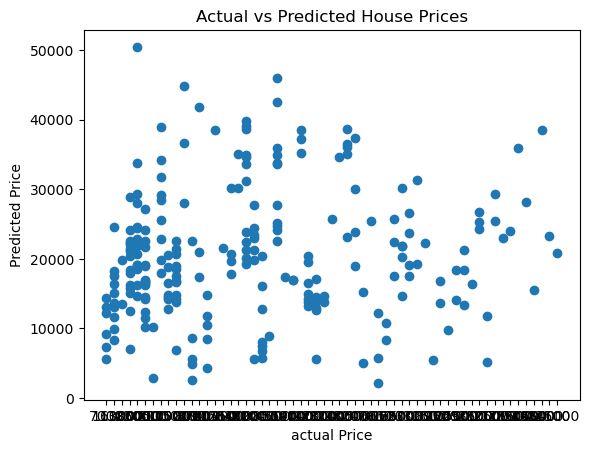

In [95]:
plt.scatter(y_test, y_pred)
plt.xlabel("actual Price")
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()

In [96]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() 
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [97]:
import joblib

# Save model
joblib.dump(model, "house_rent_linear_model.pkl")

# Save scaler
joblib.dump(scalar, "scaler.pkl")

print("Model and scaler saved successfully!")

Model and scaler saved successfully!


In [101]:
# New house details
new_house = pd.DataFrame({
    'Area': [1400],
    'Bedrooms': [6],
    'Washrooms': [3]
})

# Convert categorical columns
new_house = pd.get_dummies(new_house)

# Match training columns
new_house = new_house.reindex(columns=x.columns, fill_value=0)

# Scale input (IMPORTANT: use scalar, not loaded_scaler)
new_house_scaled = scalar.transform(new_house)

# Predict price (IMPORTANT: use model, not loaded_model)
predicted_price = model.predict(new_house_scaled)

print("Predicted House Rent Price:", predicted_price[0])


Predicted House Rent Price: 22059.542898483232
